In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,balanced_accuracy_score,f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from numpy.ma.extras import average
from sklearn.tree import DecisionTreeClassifier

In [3]:
X =  pd.read_csv("dat_python.csv")

In [4]:
X[["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate"]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1007,22,120,60,15.0,98.0,80
1008,55,120,90,18.0,98.0,60
1009,35,85,60,19.0,98.0,86
1010,43,120,90,18.0,98.0,70


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate"]], X[["RiskLevel"]], test_size=0.2, random_state=1)

In [ ]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [7]:
dt = DecisionTreeClassifier(max_depth=10,criterion="entropy",random_state=123)
clf = dt.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

print("DT:")
print("acc",accuracy_score(y_test, y_pred_dt))
print("bacc",balanced_accuracy_score(y_test, y_pred_dt))
print("precision",precision_score(y_test, y_pred_dt,average="micro"))
print("Sensitivity/Recall",recall_score(y_test, y_pred_dt,average="micro")) # = Sensitivity
print("specificity",balanced_accuracy_score(y_test, y_pred_dt)*2-recall_score(y_test, y_pred_dt,average="micro"))
print("f1",f1_score(y_test, y_pred_dt,average="micro"))

DT:
acc 0.8325123152709359
bacc 0.8305116033755274
precision 0.8325123152709359
Sensitivity/Recall 0.8325123152709359
specificity 0.8285108914801189
f1 0.8325123152709359


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


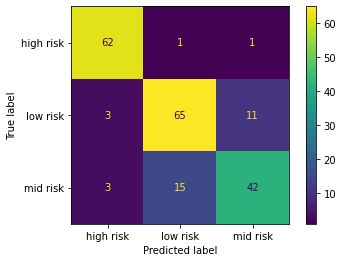

In [9]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_pred_dt,y_test)
plot_confusion_matrix(clf, X_test, y_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

   high risk       0.91      0.97      0.94        64
    low risk       0.80      0.82      0.81        79
    mid risk       0.78      0.70      0.74        60

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [11]:
import graphviz
from sklearn import tree

features= [ col for col in X_train]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=features,  
                                class_names=["high risk","low risk", "mid risk"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'


'decision_tree_graphivz.png'

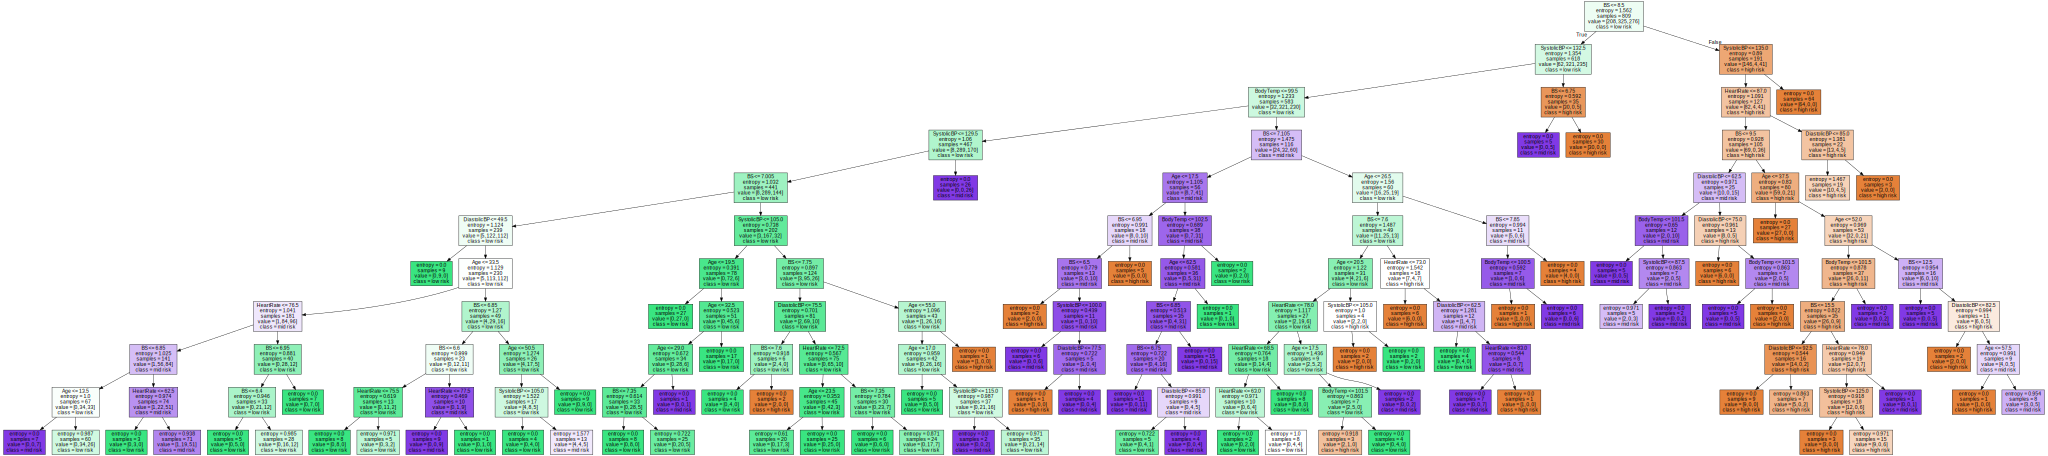

In [13]:
graph